# Import libraries

In [71]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from datetime import datetime

# Data analysis

In [72]:
# Load uploaded CSV file to inspect its structure
file_path = 'dly518.csv'
data = pd.read_csv(file_path)

# Display first few rows of the dataset
data.head()

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,ind.5,hg,sun,dos,soil,pe,evap,smd_wd,smd_md,smd_pd
0,01-sep-1945,0,19.2,0,14.4,0,13.6,0,0.2,1013.8,...,0,27,1.6,0,,1.6,2.3,,,
1,02-sep-1945,0,20.7,0,14.8,0,13.4,3,0.0,1018.2,...,0,16,9.3,0,,2.5,3.5,,,
2,03-sep-1945,0,23.3,0,11.8,0,9.6,3,0.0,1021.2,...,0,12,11.4,0,,2.9,3.9,,,
3,04-sep-1945,0,21.6,0,9.4,0,6.7,3,0.0,1024.2,...,0,18,5.3,0,,2.0,2.7,,,
4,05-sep-1945,0,21.3,0,12.2,0,11.3,3,0.0,1024.9,...,0,13,3.6,0,,1.8,2.4,,,


# Display basic information

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28916 entries, 0 to 28915
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    28916 non-null  object 
 1   ind     28916 non-null  int64  
 2   maxtp   28916 non-null  float64
 3   ind.1   28916 non-null  int64  
 4   mintp   28916 non-null  float64
 5   igmin   28916 non-null  object 
 6   gmin    28916 non-null  object 
 7   ind.2   28916 non-null  int64  
 8   rain    28916 non-null  float64
 9   cbl     28916 non-null  float64
 10  wdsp    28916 non-null  float64
 11  ind.3   28916 non-null  int64  
 12  hm      28916 non-null  int64  
 13  ind.4   28916 non-null  int64  
 14  ddhm    28916 non-null  int64  
 15  ind.5   28916 non-null  int64  
 16  hg      28916 non-null  int64  
 17  sun     28916 non-null  float64
 18  dos     28916 non-null  object 
 19  soil    28916 non-null  object 
 20  pe      28916 non-null  object 
 21  evap    28916 non-null  object 
 22

# Cleaning data

In [74]:
# Step 1: Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%d-%b-%Y', errors='coerce')

In [75]:
# Replace invalid strings with NaN and convert specific columns to numeric where applicable
cols_to_convert = ['igmin', 'gmin', 'smd_wd', 'smd_md', 'smd_pd']
for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [76]:
# Filter data starting from January 1, 1990
data = data[data['date'] >= datetime(1990, 1, 1)]

In [77]:
# Dropping rows with missing dates as they are essential
data = data.dropna(subset=['date'])

In [78]:
# For other columns, fill missing values with the column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

In [79]:
# Optionally drop irrelevant or duplicate columns (if required)
irrelevant_columns = ['ind', 'ind.1', 'ind.2', 'ind.3', 'ind.4', 'ind.5', 'hg', 'dos', 'soil', 'pe', 'evap']
data.drop(columns=irrelevant_columns, inplace=True, errors='ignore')

In [80]:
# Display cleaned data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12723 entries, 16193 to 28915
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12723 non-null  datetime64[ns]
 1   maxtp   12723 non-null  float64       
 2   mintp   12723 non-null  float64       
 3   igmin   12723 non-null  float64       
 4   gmin    12723 non-null  float64       
 5   rain    12723 non-null  float64       
 6   cbl     12723 non-null  float64       
 7   wdsp    12723 non-null  float64       
 8   hm      12723 non-null  int64         
 9   ddhm    12723 non-null  int64         
 10  sun     12723 non-null  float64       
 11  smd_wd  12723 non-null  float64       
 12  smd_md  12723 non-null  float64       
 13  smd_pd  12723 non-null  float64       
dtypes: datetime64[ns](1), float64(11), int64(2)
memory usage: 1.5 MB


In [81]:
data.head()

,date,maxtp,mintp,igmin,gmin,rain,cbl,wdsp,hm,ddhm,sun,smd_wd,smd_md,smd_pd
16193,1990-01-01,9.2,4.2,0.0,1.5,0.0,1005.3,5.2,15,100,3.7,0.2,0.2,-9.3
16194,1990-01-02,8.3,5.0,0.0,0.8,8.0,1003.2,8.6,25,160,1.7,0.0,-7.4,-10.0
16195,1990-01-03,7.0,4.5,0.0,2.1,0.2,1008.2,2.3,6,150,0.1,0.1,0.1,-9.4
16196,1990-01-04,10.9,4.6,0.0,0.3,1.5,1010.2,7.5,14,170,0.0,0.0,-0.9,-9.9
16197,1990-01-05,10.4,2.9,1.0,-0.5,0.0,1008.7,7.1,15,160,0.3,0.3,0.3,-9.1


In [82]:
# Save the cleaned data for further analysis
cleaned_file_path = 'cleaned_dly518.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to: {cleaned_file_path}")

Cleaned data saved to: cleaned_dly518.csv


In [83]:
# Convert date column to datetime for proper time-series plotting
data['date'] = pd.to_datetime(data['date'])

# Analysis and plotting

In [110]:
# Set the style for plots
sns.set_theme(style="whitegrid")

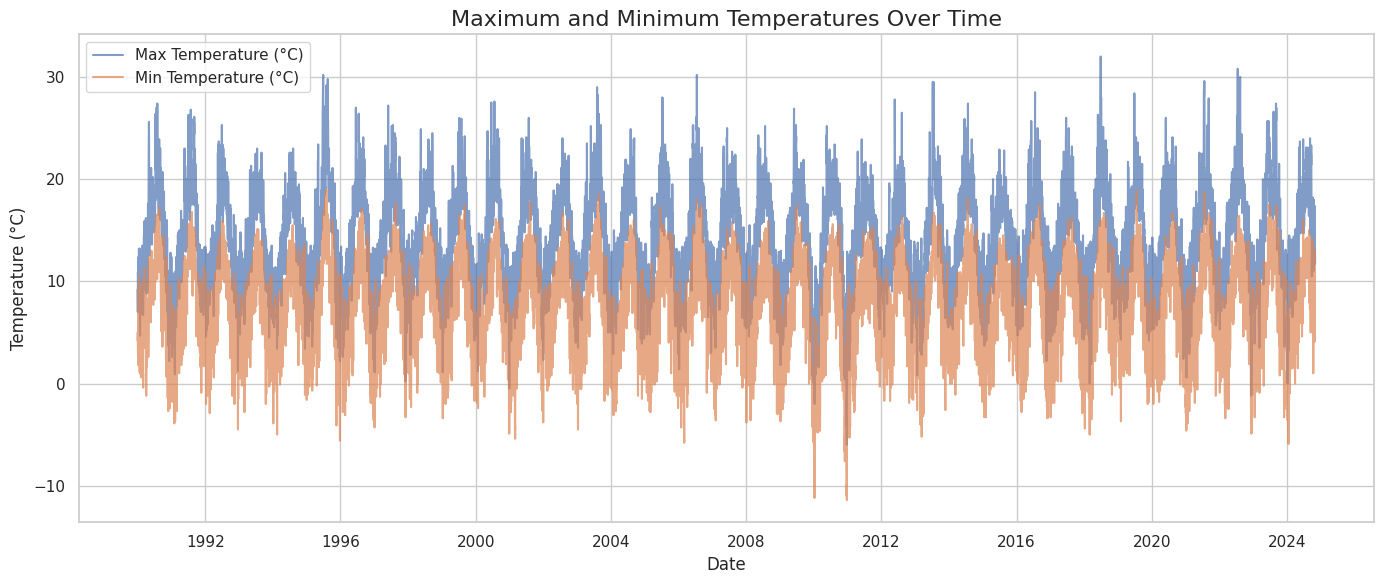

In [111]:
# Plot 1: Time-Series Plot for Maximum and Minimum Temperatures
plt.figure(figsize=(14, 6))
plt.plot(data['date'], data['maxtp'], label='Max Temperature (°C)', alpha=0.7)
plt.plot(data['date'], data['mintp'], label='Min Temperature (°C)', alpha=0.7)
plt.title('Maximum and Minimum Temperatures Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

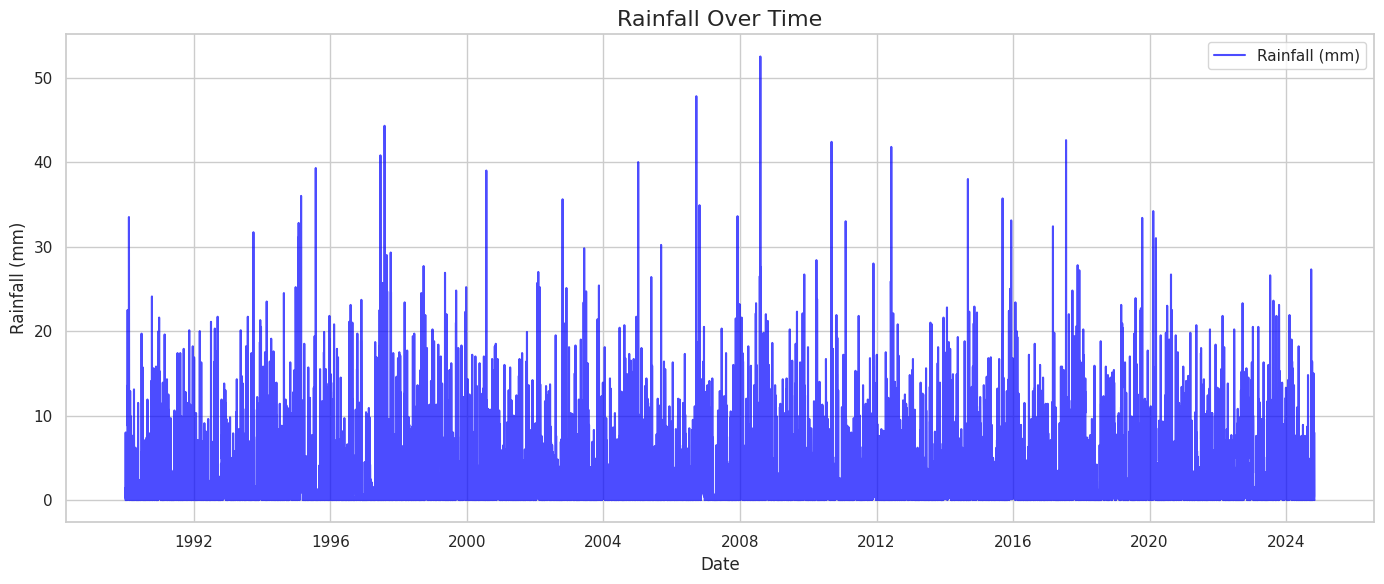

In [112]:
# Plot 2: Time-Series Plot for Rainfall
plt.figure(figsize=(14, 6))
plt.plot(data['date'], data['rain'], label='Rainfall (mm)', color='blue', alpha=0.7)
plt.title('Rainfall Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rainfall (mm)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

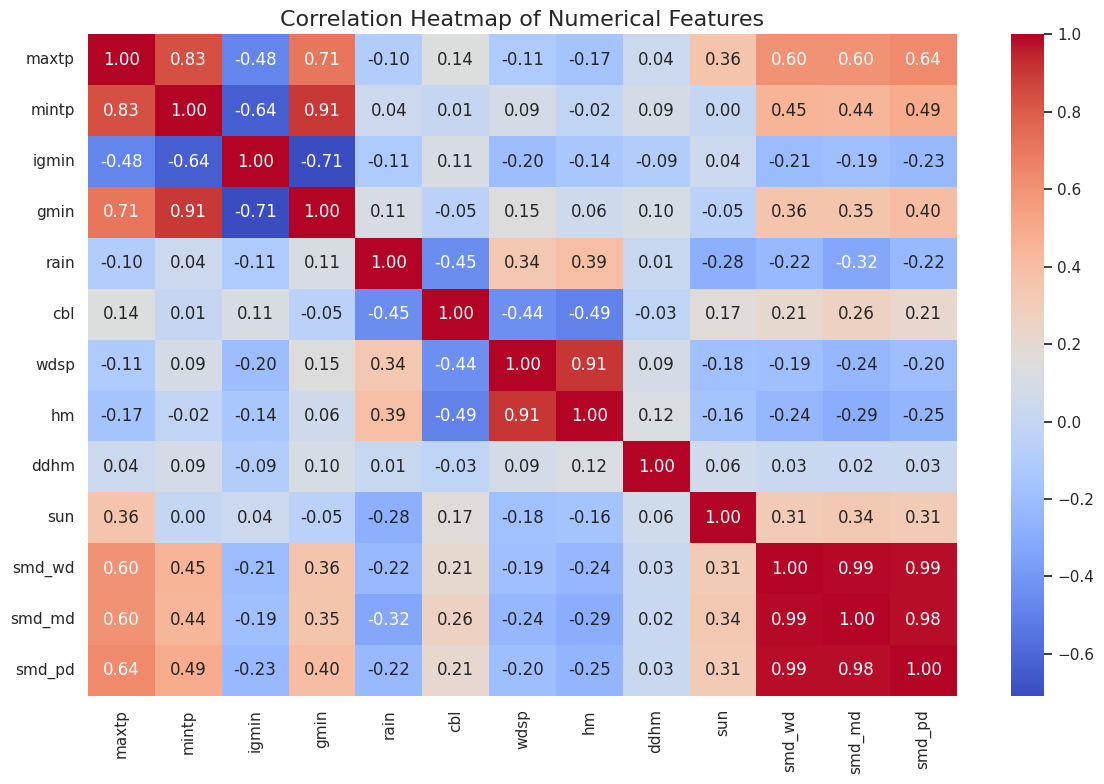

In [113]:
# Plot 3: Correlation Heatmap
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

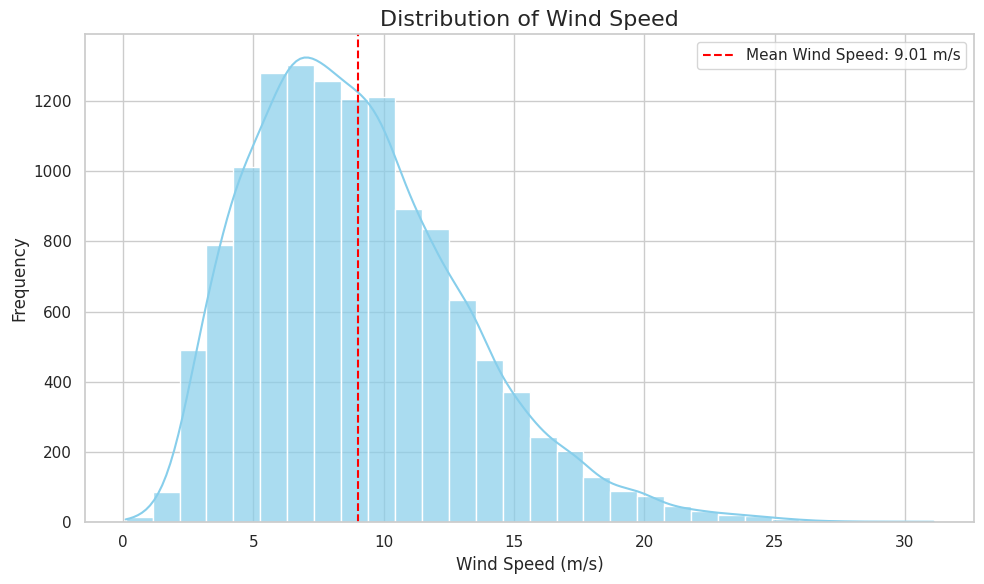

In [114]:
# Plot 4: Histogram of Wind Speed Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['wdsp'], bins=30, kde=True, color='skyblue', alpha=0.7)
plt.axvline(data['wdsp'].mean(), color='red', linestyle='--', label=f'Mean Wind Speed: {data["wdsp"].mean():.2f} m/s')
plt.title('Distribution of Wind Speed', fontsize=16)
plt.xlabel('Wind Speed (m/s)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

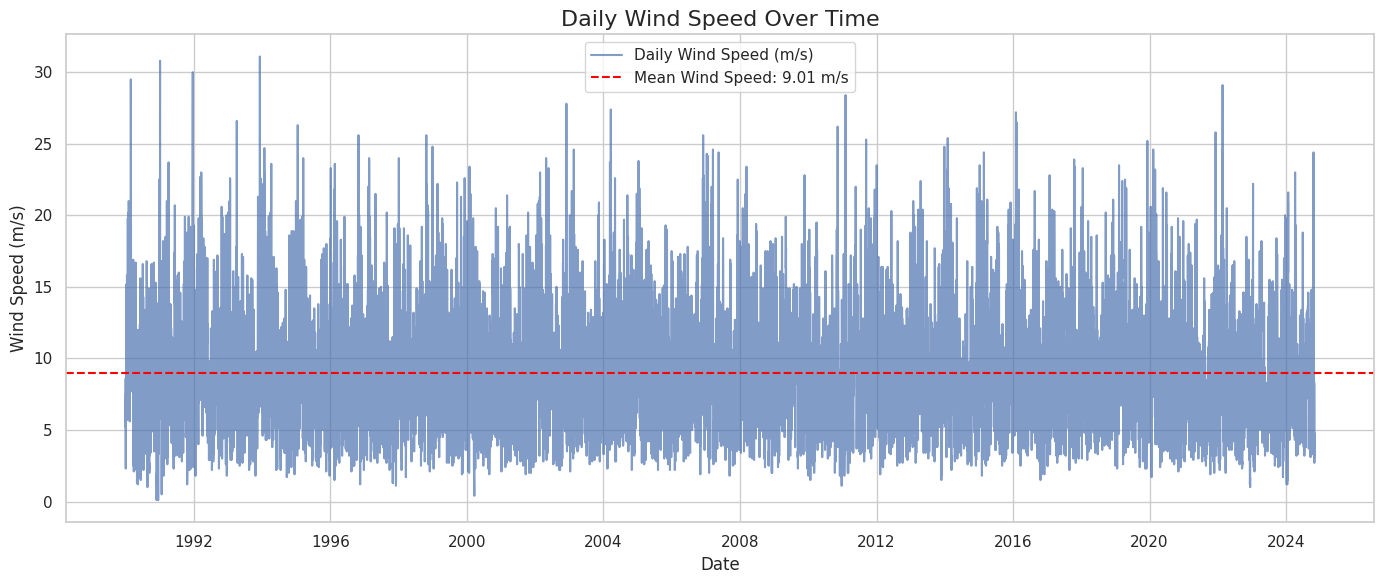

In [115]:
# Plot 5: Time-Series Plot for Wind Speed with Mean Line
plt.figure(figsize=(14, 6))
plt.plot(data['date'], data['wdsp'], label='Daily Wind Speed (m/s)', alpha=0.7)
plt.axhline(data['wdsp'].mean(), color='red', linestyle='--', label=f'Mean Wind Speed: {data["wdsp"].mean():.2f} m/s')
plt.title('Daily Wind Speed Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Wind Speed (m/s)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

In [116]:
# Extract Month from Date for Grouped Analysis
data['month'] = data['date'].dt.month

/tmp/ipykernel_6913/3685012920.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='wdsp', data=data, palette='coolwarm')


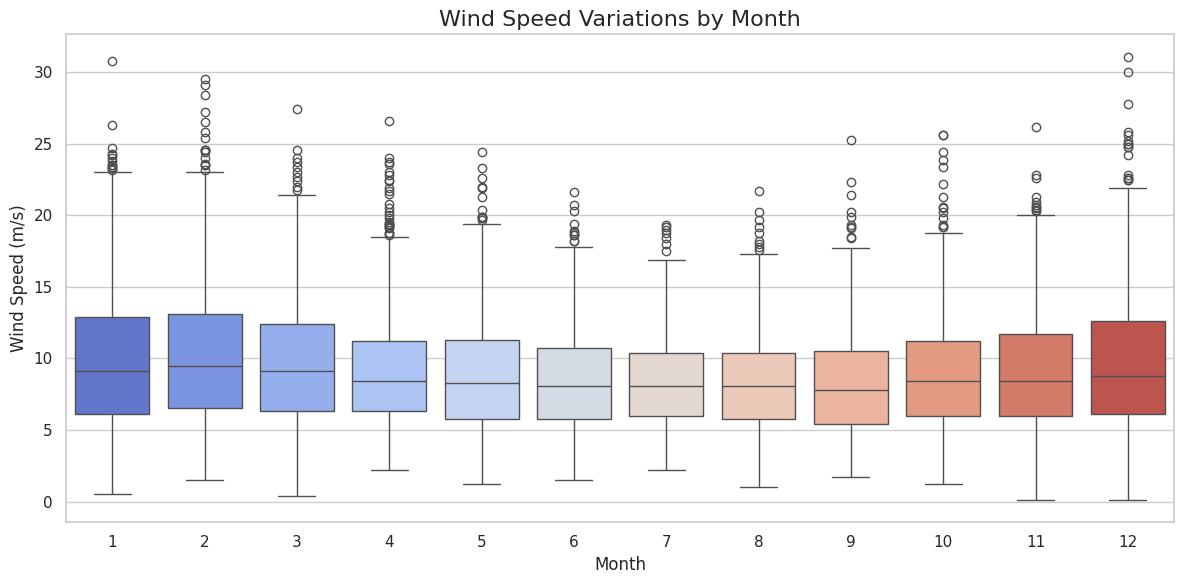

In [117]:
# Plot 6: Boxplot of Wind Speed by Month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='wdsp', data=data, palette='coolwarm')
plt.title('Wind Speed Variations by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Wind Speed (m/s)', fontsize=12)
plt.tight_layout()
plt.show()

### Are the wind speeds likely to be the same in 10 years in the future? 

In [118]:
# Filter valid wind speed data and extract yearly averages
data = data.dropna(subset=['wdsp'])
data['year'] = data['date'].dt.year
annual_mean = data.groupby('year')['wdsp'].mean().reset_index()


In [119]:
# Prepare data for regression
X = annual_mean['year'].values.reshape(-1, 1)
y = annual_mean['wdsp'].values

In [120]:
# Perform linear regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [121]:
# Predict wind speed 10 years into the future
future_years = np.arange(X.min(), X.max() + 11).reshape(-1, 1)
future_predictions = model.predict(future_years)


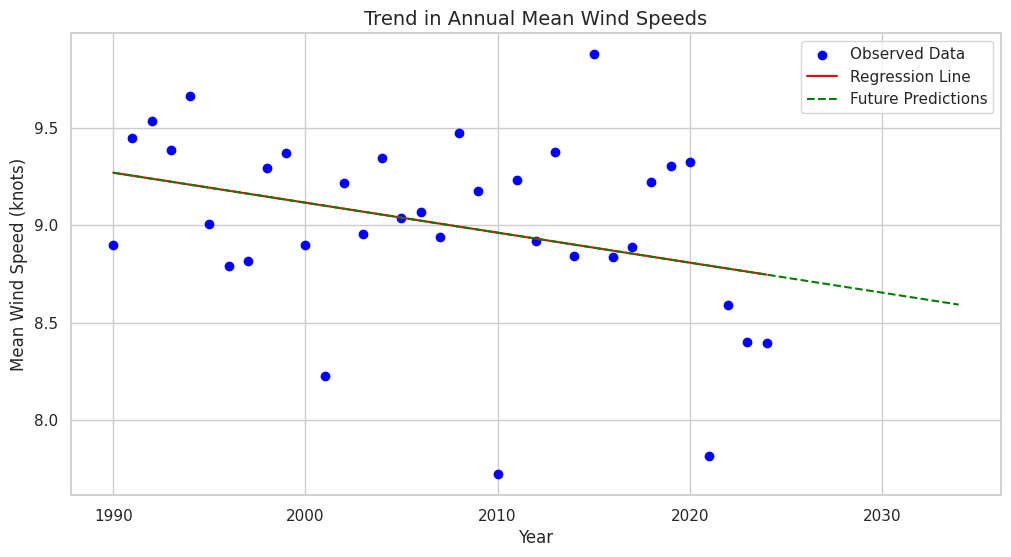

In [122]:
# Visualize the results
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Observed Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.plot(future_years, future_predictions, color='green', linestyle='--', label='Future Predictions')
plt.title('Trend in Annual Mean Wind Speeds', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Wind Speed (knots)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### Explanation:Slope of the regression line: A positive slope indicates increasing wind speeds over time. A negative slope indicates decreasing wind speeds. R-squared value: Indicates how well the regression model explains the variance in the data.Future Predictions: Predict wind speed for 10 years ahead based on the regression line.

## Conclusion:
#### Conclude findings from the analysis, discussing: The effectiveness of data cleaning and normalization.How regression and interpolation impacted data accuracy. Any patterns or trends observed in the wind speed data over time.